<a href="https://colab.research.google.com/github/RalphLynnMora/Coding-Projects/blob/main/NuSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-0.014489  -0.029422  -0.037648  -0.038     -0.030087  -0.014186
  0.0084588  0.035083   0.061171   0.08112    0.089916   0.085298
  0.069366   0.048646   0.032247   0.028639   0.042318   0.071788
  0.10979    0.14581    0.16981    0.17591    0.16423    0.14044
  0.11293    0.088807   0.070628   0.055317   0.036126   0.0068755
 -0.033411  -0.077884  -0.11289   -0.12271   -0.096243  -0.032922
  0.054952   0.14468    0.20997    0.22979    0.19587    0.11606
  0.011815  -0.089208  -0.16286   -0.19654   -0.19255   -0.16562
 -0.13595   -0.12088   -0.12843   -0.15509   -0.18821   -0.21172
 -0.21291   -0.18774   -0.14273   -0.092637  -0.054914  -0.042809
 -0.05981   -0.097561  -0.13814   -0.15996   -0.14536   -0.087239
  0.007498   0.11899    0.21993    0.28396    0.2943     0.24977
  0.16573    0.069561  -0.0083135 -0.04475   -0.031997   0.019442
  0.084461   0.13241  ]
[ 0.040922   0.099263   0.16226    0.2163     0.24839    0.25057
  0.2233     0.17613    0.12478    0.085319   0.067673   

ValueError: ignored

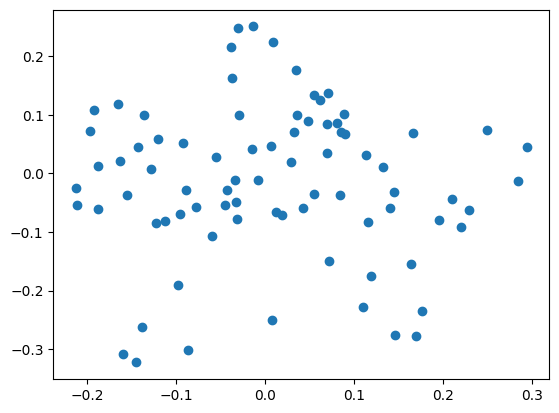

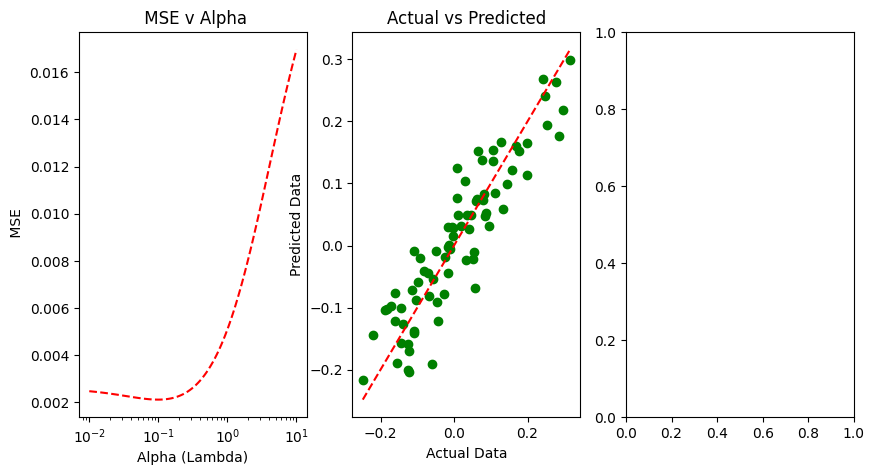

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import NuSVR

################################################################################

data = pd.read_csv("data.csv")

ftest= data.iloc[:,0].values
ftrain= data.iloc[:,1].values
Xtest = data.iloc[:, 2:20].values
Xtrain = data.iloc[:, 21:39].values
ytest = data.iloc[:, 40].values
ytrain = data.iloc[:, 41].values

print(ftest)
print(ftrain)

scaler = StandardScaler()
Xtrain = np.column_stack((Xtrain, ftrain))
Xtest = np.column_stack((Xtest, ftest))

X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2)

plt.scatter(ftest,ftrain)

################################################################################

regressor = SVR(kernel='rbf')
regressor.fit(Xtrain,ytrain)
y_pred = regressor.predict(Xtest)

lamda = np.logspace(-2, 1, 100)

mse_values = []


ridge = Ridge()

for i in lamda:
    ridge.alpha = i
    ridge.fit(X_train, y_train)
    y_pred_val = ridge.predict(X_val)
    val_mse = mean_squared_error(y_val, y_pred_val)
    mse_values.append(val_mse)

optimal_alpha = lamda[np.argmin(mse_values)]

final_ridge_model=Ridge(alpha=optimal_alpha)
final_ridge_model.fit(Xtrain, ytrain)

y_pred_test = final_ridge_model.predict(Xtest)

test_mse = mean_squared_error(ytest, y_pred_test)

print(f'Optimal Alpha: {optimal_alpha}')
print(f'Optimal Validation MSE: {min(mse_values)}')
print(f'Test Mean Squared Error: {test_mse}')

####################################################################################################
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(lamda, mse_values, '--', color='red')
plt.xlabel('Alpha (Lambda)')
plt.ylabel(' MSE')
plt.xscale('log')
plt.title(' MSE v Alpha')

plt.subplot(1, 3, 2)
plt.scatter(ytest, y_pred_test, color='green', label='Predicted')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red', label='Actual')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual vs Predicted')

plt.subplot(1, 3, 3)

Xtrain.size

plt.scatter(Xtrain, ytest, color = 'red')
plt.plot(Xtest, y_pred, color = 'green')

plt.tight_layout()
plt.show()



# New Section

<Axes: title={'center': 'Nu-SVM'}>

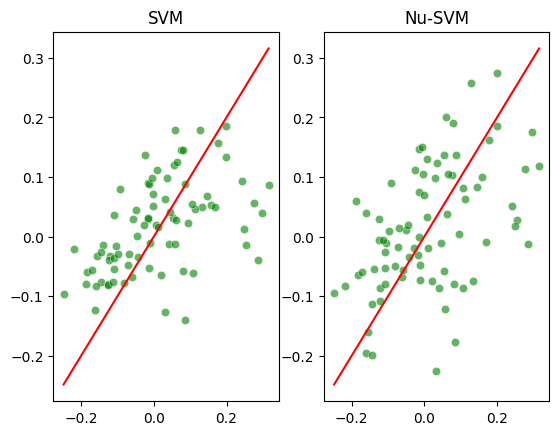

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import NuSVR
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")

ftest= data.iloc[:,0]
ftrain= data.iloc[:,1]
Xtest = data.iloc[:, 2:20].values
Xtrain = data.iloc[:, 21:39].values
ytest = data.iloc[:, 40].values
ytrain = data.iloc[:, 41].values



X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2)

SVM_regrssion = SVR()
SVM_regrssion.fit(Xtrain,ytrain)
yhat = SVM_regrssion.predict(Xtest)

plt.subplot(1,2,1)
plt.title("SVR")
sns.scatterplot(x=ytest,y=yhat,alpha=.6,color = 'green')
sns.lineplot(x=ytest,y=ytest,color = 'red')
SVM_regrssion = NuSVR()
SVM_regrssion.fit(Xtrain,ytrain)
yhat = SVM_regrssion.predict(Xtest)
plt.subplot(1,2,2)
plt.title("Nu-SVR")
sns.scatterplot(x=ytest,y=yhat,alpha=.6,color = 'green')
sns.lineplot(x=ytest,y=ytest,color = 'red')



